# Analysis of Parents' Education Level on Student's Test Performance

This notebook presents an ANCOVA analysis exploring the impact of parental education levels on student test scores, controlling for reading and writing scores. The dataset includes scores from math, reading, and writing tests, alongside categorical variables such as parental education level or whether or not test preperation was completed.

## Objective

The objective is to determine if parental education levels significantly affect student test scores, providing insights into factors influencing academic performance.

## Hypothesis

We hypothesize that students with parents who have higher education levels will, on average, score higher on math tests, controlling for their reading and writing scores.

In [1]:
# LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Data Preprocessing

This preprocessing step involves selecting only the relevant features for our analysis and renaming the columns for easier access and readability in our code. Specifically, we'll focus on scores from math, reading, and writing tests, as well as demographic information such as race/ethnicity and parental level of education.

In [4]:
# PREPROCESSING
df = pd.read_csv('StudentsPerformance.csv')
perf = df.loc[:, ['math score', 'reading score', 'writing score', 'race/ethnicity', 'parental level of education']]
perf = perf.rename(columns={
    'math score': 'math_score',
    'reading score': 'reading_score',
    'writing score': 'writing_score',
    'parental level of education': 'parental_edu'
})

# Checking Linearity Between DV and Indepdendent Covariates

One of the key assumptions of ANCOVA (Analysis of Covariance) is the linearity between the covariates and the dependent variable. To ensure that our data meets this assumption, we will visualize the relationship between our covariates (reading and writing scores) and each dependent variable (math, reading, and writing scores) using scatter plots with regression lines.

These plots will help us visually assess whether a linear relationship exists, which is crucial for the validity of the ANCOVA analysis.

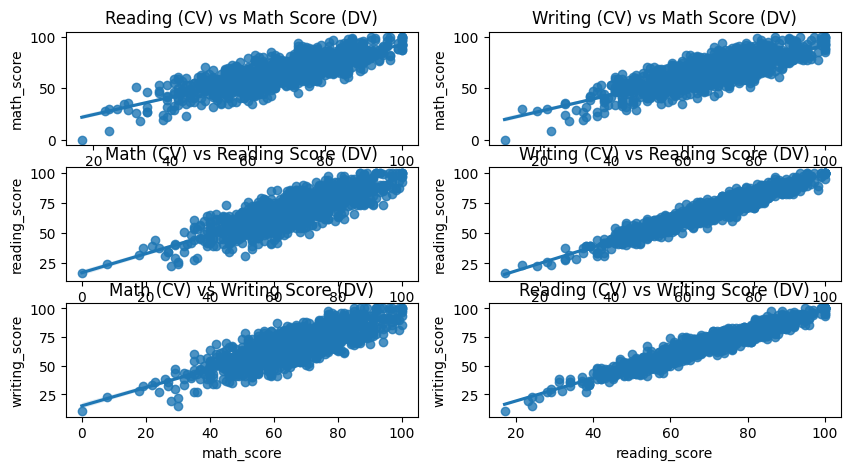

In [6]:
#   CHECKING LINEARITY ASSUMPTION BETWEEN CVs AND DV
fig, axes = plt.subplots(3, 2, figsize=(10, 5))
axes = axes.flatten()
sns.regplot(ax=axes[0], x='reading_score', y='math_score', data=perf)
axes[0].set_title('Reading (CV) vs Math Score (DV)')
sns.regplot(ax=axes[1], x='writing_score', y='math_score', data=perf)
axes[1].set_title('Writing (CV) vs Math Score (DV)')
sns.regplot(ax=axes[2], x='math_score', y='reading_score', data=perf)
axes[2].set_title('Math (CV) vs Reading Score (DV)')
sns.regplot(ax=axes[3], x='writing_score', y='reading_score', data=perf)
axes[3].set_title('Writing (CV) vs Reading Score (DV)')
sns.regplot(ax=axes[4], x='math_score', y='writing_score', data=perf)
axes[4].set_title('Math (CV) vs Writing Score (DV)')
sns.regplot(ax=axes[5], x='reading_score', y='writing_score', data=perf)
axes[5].set_title('Reading (CV) vs Writing Score (DV)')
plt.show()

## Checking Homogeneity of Variances

Another assumption for ANCOVA is the homogeneity of variances, also known as homoscedasticity. This assumption requires that the variances of the dependent variable across groups defined by the independent variable are equal.

To test this assumption, we employ Levene's Test across the different levels of parental education. A non-significant result (p > 0.05) indicates that the variances are homogeneous, satisfying the assumption for ANCOVA.

In [7]:
# HOMOEGENEITY OF VARIANCES BETWEEN CATEGORIES
stat, p = stats.levene(*[group['math_score'].values for name, group in perf.groupby('parental_edu')])
print('Levene’s Test Statistic:', stat)
print('P-Value:', p)

Levene’s Test Statistic: 0.933346082636381
P-Value: 0.45839733913132197


## Checking the Normal Distribution of Residuals

The final assumption we need to verify is that the residuals from our model are normally distributed. This assumption ensures that the statistical tests we perform are valid.

We use Q-Q plots to visually assess the normality of residuals. Ideally, the data points should closely follow the 45-degree line. Deviations from this line suggest departures from normality.

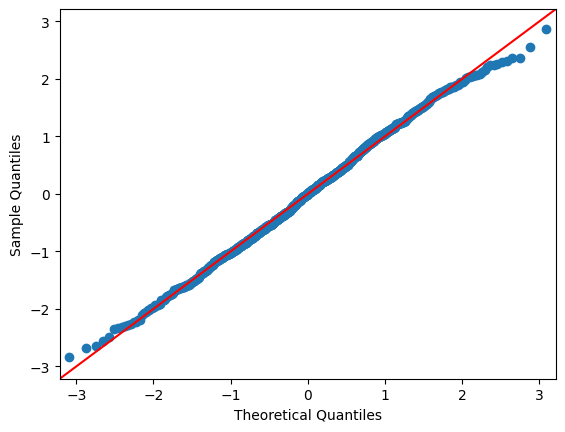

In [8]:
math_model = ols('math_score ~ reading_score + writing_score + C(parental_edu)', data=perf).fit()
math_residuals = math_model.resid
sm.qqplot(math_residuals, line='45', fit=True)
plt.show()

In [9]:
print(math_model.summary())

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     295.3
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.57e-237
Time:                        22:53:10   Log-Likelihood:                -3574.2
No. Observations:                1000   AIC:                             7164.
Df Residuals:                     992   BIC:                             7204.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


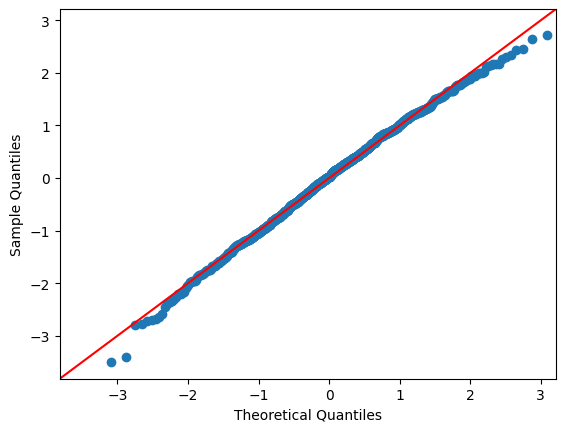

In [12]:
reading_model = ols('reading_score ~ C(parental_edu) + math_score + writing_score', data=perf).fit()
reading_residuals = reading_model.resid
sm.qqplot(reading_residuals, line='45', fit=True)
plt.show()

In [13]:
print(reading_model.summary())

                            OLS Regression Results                            
Dep. Variable:          reading_score   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     1635.
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:22:45   Log-Likelihood:                -2835.0
No. Observations:                1000   AIC:                             5686.
Df Residuals:                     992   BIC:                             5725.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


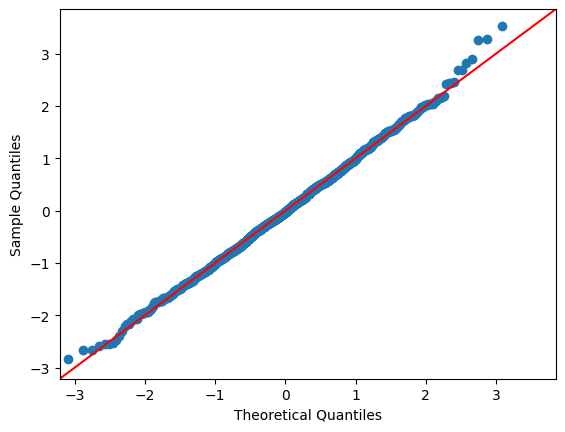

In [14]:
writing_model = ols('writing_score ~ C(parental_edu) + math_score + reading_score', data=perf).fit()
writing_residuals = writing_model.resid
sm.qqplot(writing_residuals, line='45', fit=True)
plt.show()

In [16]:
print(writing_model.summary())

                            OLS Regression Results                            
Dep. Variable:          writing_score   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     1559.
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:37:07   Log-Likelihood:                -2896.9
No. Observations:                1000   AIC:                             5810.
Df Residuals:                     992   BIC:                             5849.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
